In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
image=cv2.imread('./Photos/12.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)



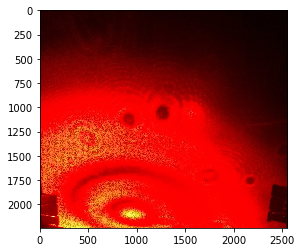

In [3]:
plt.imshow(image_rgb)
plt.show()

In [4]:
lower=np.asarray([200,0,0])
upper=np.asarray([255,255,255])

# lower=np.asarray([100,0,0])
# upper=np.asarray([255,255,180])

mask=cv2.inRange(image_rgb,lower,upper)
output = cv2.bitwise_and(image, image, mask = mask)

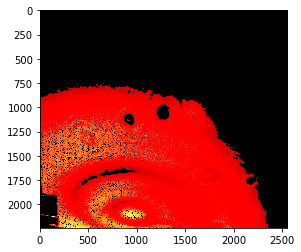

In [5]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()


In [6]:
kernel = np.ones((10,10),np.uint8)
kernel2=cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))


closing = cv2.morphologyEx(output, cv2.MORPH_CLOSE, kernel)
erosion = cv2.dilate(closing,kernel2,iterations = 1)



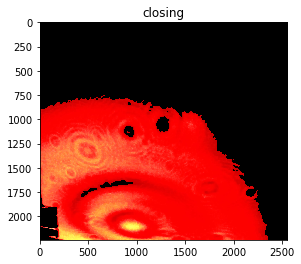

In [7]:
plt.figure(1)

plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))

plt.title('closing')
plt.show()



In [8]:
closing_Re=cv2.resize(closing,(400,400));

copy_closing=closing_Re.copy();

gray_output= cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
gray_output=cv2.resize(gray_output,(400,400))

clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(10,10));
contrast_equ = clahe.apply(gray_output);  ## To detect more circles improve contrast enhancement methods(GLG,Homorphic filtering)


gray = cv2.bilateralFilter(contrast_equ, 10, 17, 17)

ret,thresh1 = cv2.threshold(contrast_equ,90,255,cv2.THRESH_BINARY)   

kernel = np.ones((5,5),np.uint8)
closing2 = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

kernel = np.ones((7,7),np.uint8)
erosion = cv2.erode(closing2,kernel,iterations = 1)

kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(erosion,kernel,iterations = 1)



# kernel=np.ones((2,2),np.uint8)
# gray = cv2.bilateralFilter(gray_output, 10, 17, 17)
# erosion = cv2.erode(contrast_equ,kernel,iterations = 1)
# edges=cv2.Canny(erosion,200,200)



[_,contours, heir]=cv2.findContours(dilate.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
# M = cv2.moments(cnt)
print len(contours)


cv2.drawContours(copy_closing, contours, -1, (0,255,0), 1)
cv2.imshow('Constrast_equalisation',contrast_equ)

cv2.imshow('Bilateral filtering',gray)

cv2.imshow('Binary Image',thresh1)

cv2.imshow('Closing',closing2)

cv2.imshow('erosion',erosion)

cv2.imshow('contours',copy_closing)

cv2.imshow('dilation',dilate)

cv2.waitKey(0)




16


113

In [9]:
print "Expected ratio = ",4*math.pi; 
Expected_ratio= 4*math.pi
circular=[]
radius1=[]

copy_closing=closing_Re.copy();


for cnt in contours:
    
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    rad=perimeter/(2*(math.pi+0.0))
    ratio=(perimeter**2)/(area+0.0)
    if abs(Expected_ratio - ratio)<8 and rad<19:
        print rad
        radius1.append(rad)
        circular.append(cnt)

Expected ratio =  12.5663706144
9.25360824792
6.66851170525
5.35665470732
16.822436216
3.9515668984
5.03834482114
10.4882303395
4.72003493495
17.1021286679
4.49495585977
16.5427438209
18.2661414971


In [11]:
print len(circular)


cv2.drawContours(copy_closing, circular, -1, (0,255,0), 1)
cv2.imshow('Circular point2',copy_closing)
cv2.waitKey(0)

12


113

In [ ]:
import cv2

cap = cv2.VideoCapture('./Bacteria Expts Videos/Bisleri water 5mW 03082017.MTS')
frame_width = int(cap.get(3))         
frame_height = int(cap.get(4))
print frame_width, '*' ,frame_height

frame_rate=25;
vid = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), frame_rate, (frame_width,frame_height))
frame_count=0
while(cap.isOpened()):
    ret, frame = cap.read()
    frame_count=frame_count+1
    (dimensions_x,dimensions_y,z)=frame.shape 
    images=frame 
    copy_image=images
    images=cv2.resize(images,(400,400))
    cv2.imshow('window2',images)
    cv2.waitKey(0)
    